In [1]:
import pdfplumber

In [2]:
def search_phrase(page, search_phrase):
    counter = 0
    phrase_counter = 0
    words = page.extract_words()
    search_phrase_words = search_phrase.split(' ')
    while counter < len(words):
        word = words[counter]
        if word['text'] == search_phrase_words[phrase_counter]:
            if phrase_counter == len(search_phrase_words) - 1:
                start_index = counter-len(search_phrase_words)+1
                return words[start_index:counter+1]
                break
            phrase_counter += 1
        else:
            phrase_counter = 0    
        counter += 1

In [3]:
def search_phrase_with_font(page, search_phrase, fontname=None):
    counter = 0
    phrase_counter = 0
    while counter < len(page.chars):
        char = page.chars[counter]
        if char['fontname'] == fontname or not fontname:
            if char['text'] == search_phrase[phrase_counter]:
                if phrase_counter == len(search_phrase) - 1:
                    start_index = counter-len(search_phrase)+1
                    return page.chars[start_index:counter+1]
                    break
                phrase_counter += 1
            else:
                phrase_counter = 0    
        counter += 1

In [4]:
def get_text_between(page, top_phrase, bottom_phrase, right_phrase, margin=1, debug=False):
    top = min(x['bottom'] for x in search_phrase(page, top_phrase))
    left = min(x['x0'] for x in search_phrase(page, top_phrase))
    bottom = max(x['top'] for x in search_phrase(page, bottom_phrase))
    right = min(x['x0'] for x in search_phrase(page, right_phrase))
    bbox = (left-margin, top-margin, right, bottom+margin)
    if debug:
        display(page.crop(bbox).to_image())
    return normalize_spacing(page.within_bbox(bbox).extract_text())

In [5]:
def normalize_spacing(x):
    return ' '.join(x.split())

In [6]:
pdf = pdfplumber.open("volumes-elements-2013-eo-april-09178e72.pdf")
page = pdf.pages[0]

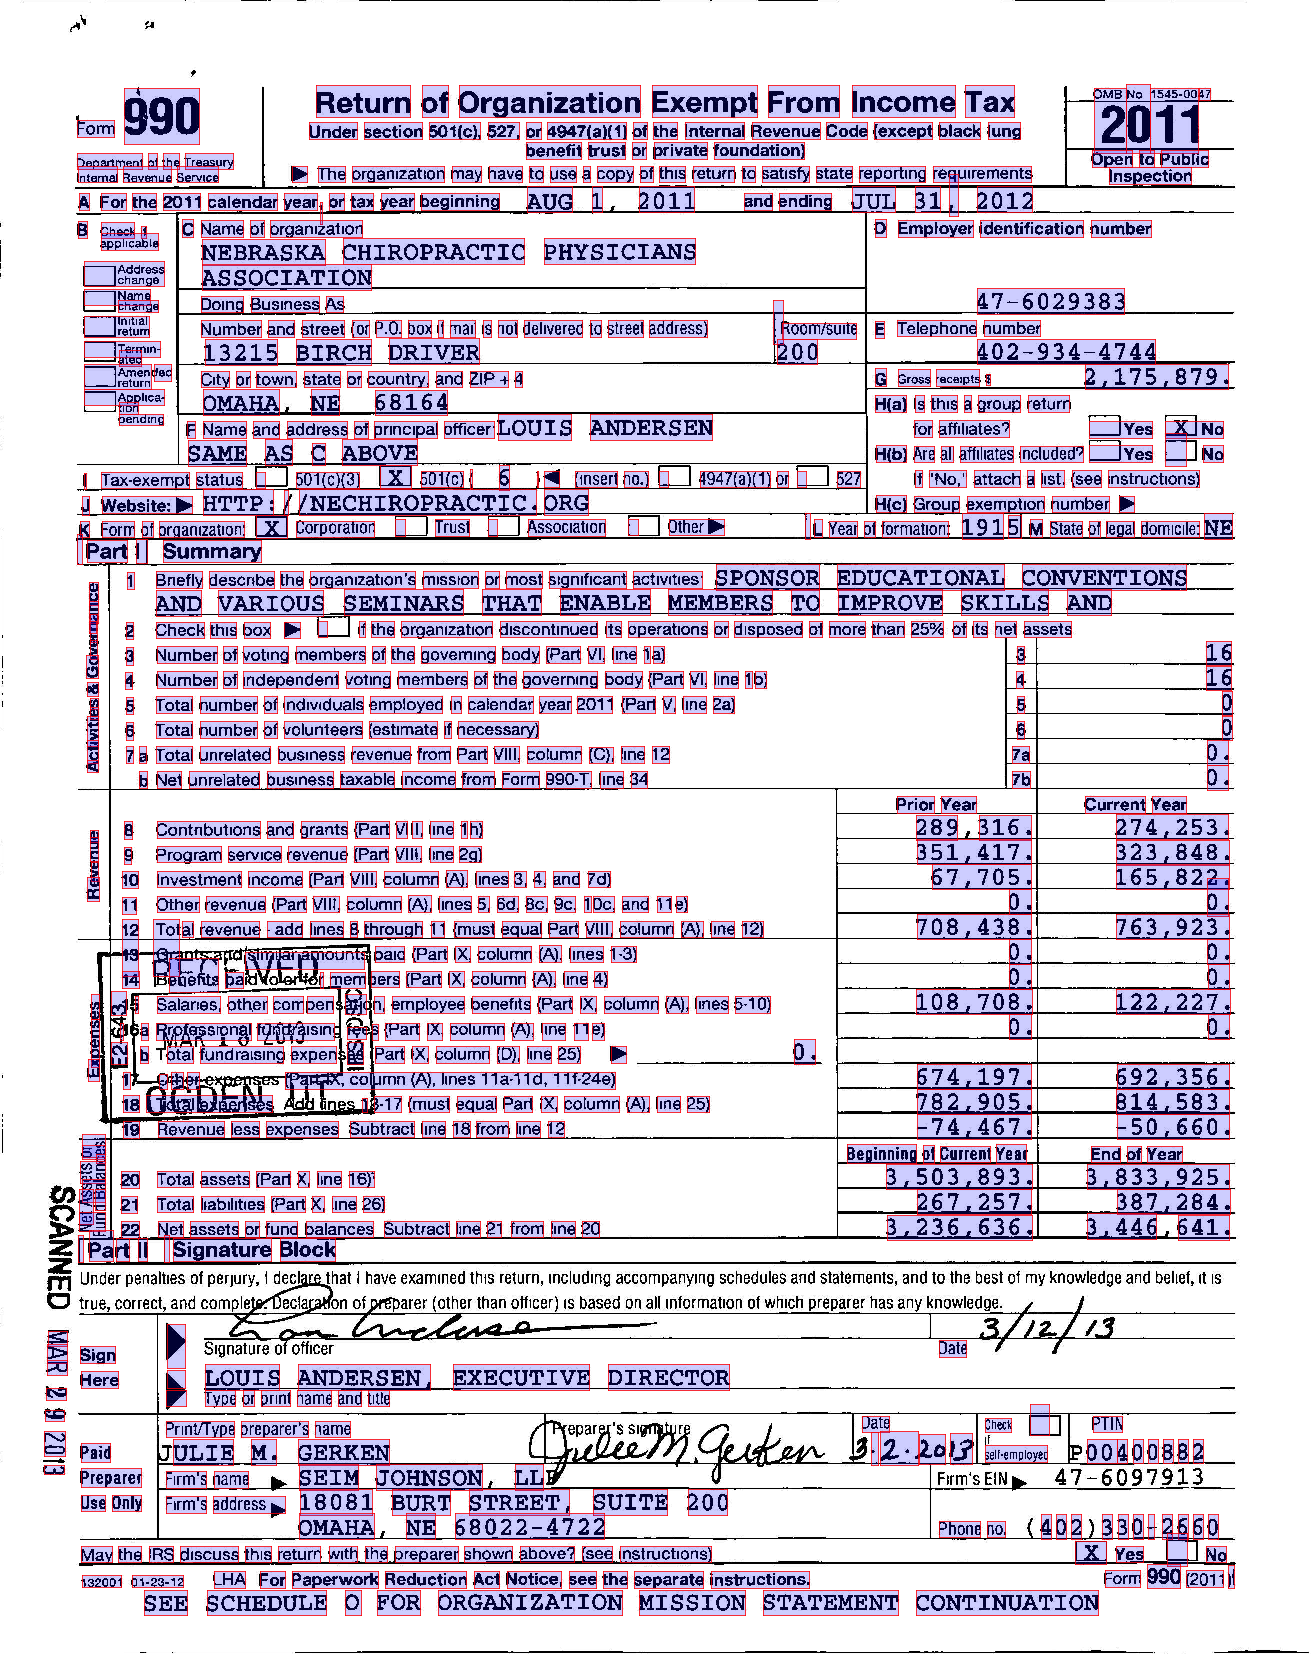

In [7]:
page.to_image(resolution=150).outline_words()

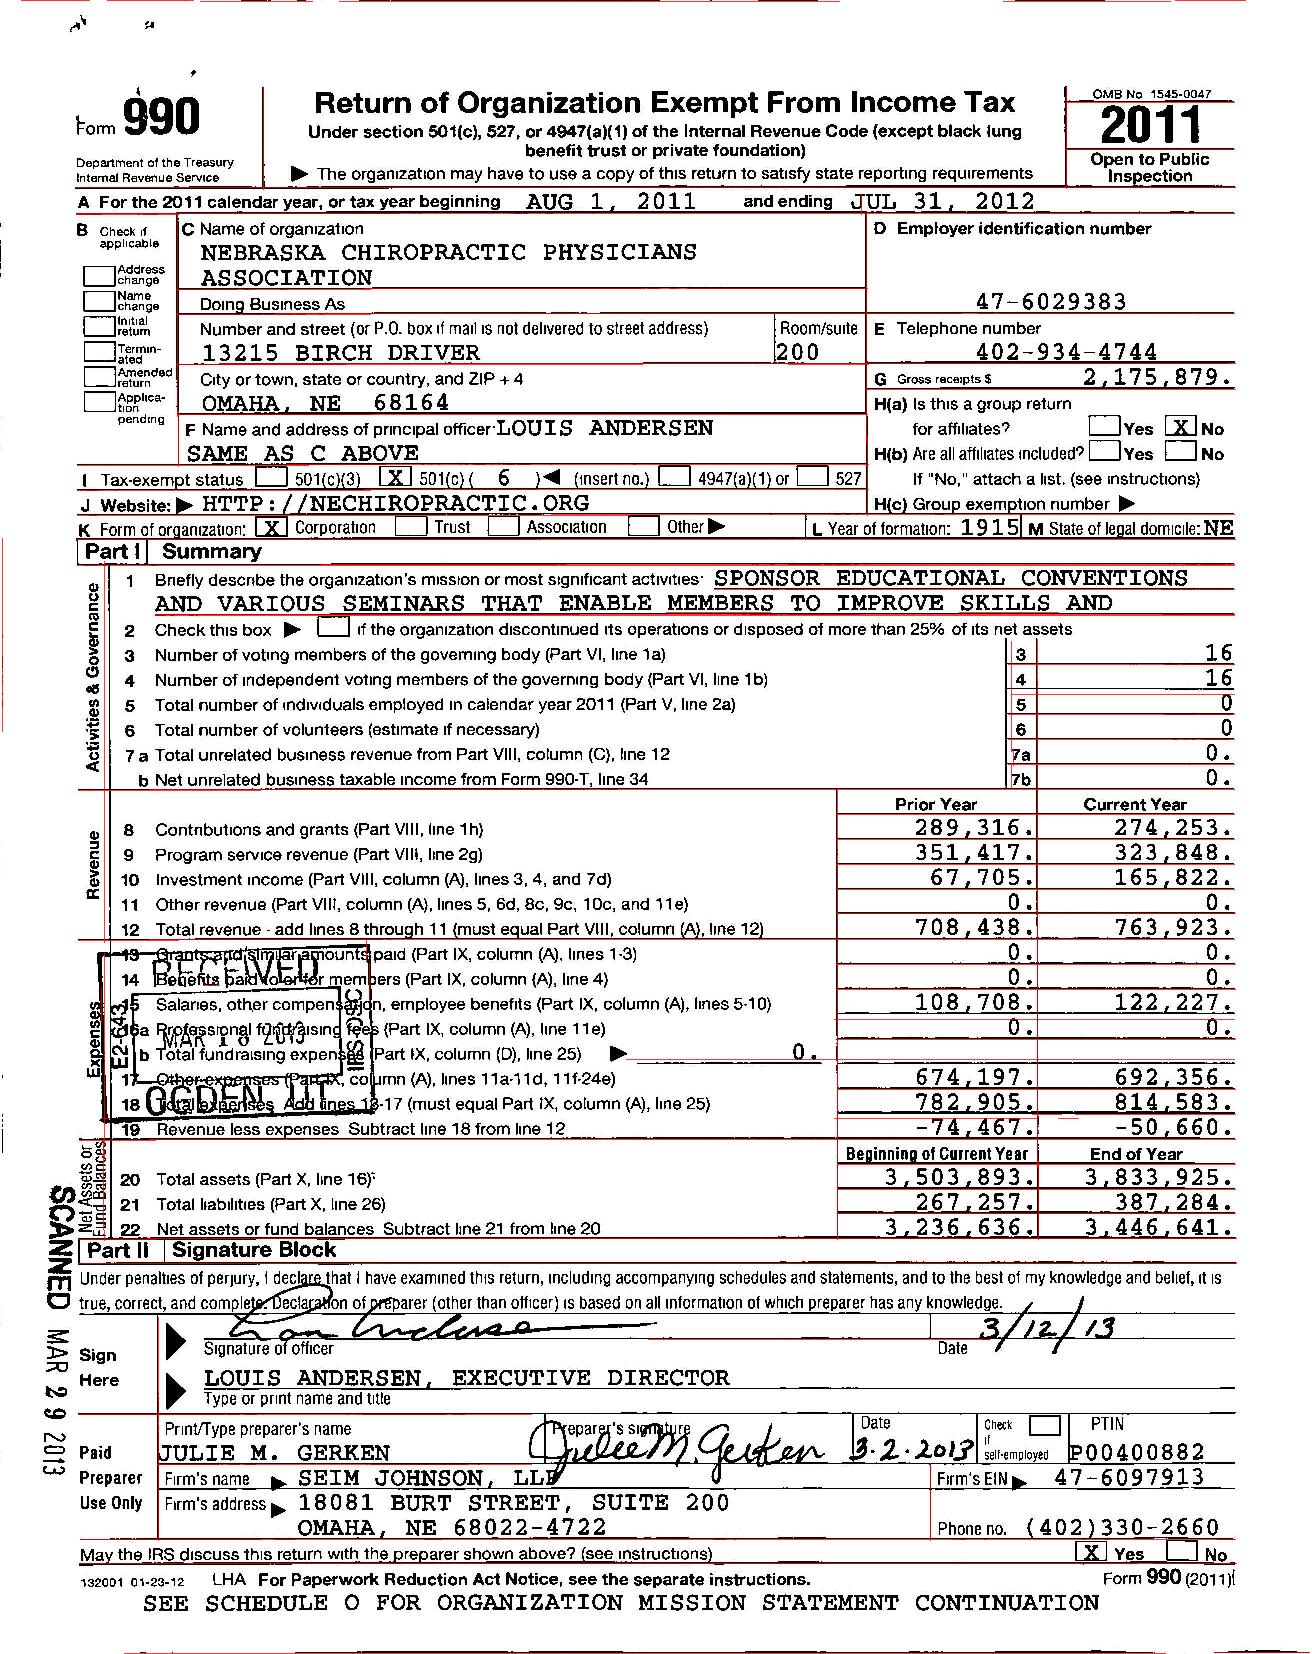

In [8]:
page.to_image(resolution=150).draw_lines(page.lines)

In [9]:
search_phrase(page, 'NEBRASKA')

[{'x0': Decimal('96.680'),
  'x1': Decimal('156.600'),
  'top': Decimal('114.225'),
  'bottom': Decimal('127.831'),
  'text': 'NEBRASKA'}]

In [10]:
search_phrase_with_font(page, 'LOUIS ANDERSEN', 'Times-Bold')

[{'fontname': 'Times-Bold',
  'adv': Decimal('0.667'),
  'upright': 1,
  'x0': Decimal('238.740'),
  'y0': Decimal('582.329'),
  'x1': Decimal('246.611'),
  'y1': Decimal('595.935'),
  'width': Decimal('7.871'),
  'height': Decimal('13.605'),
  'size': Decimal('13.605'),
  'object_type': 'char',
  'page_number': 1,
  'text': 'L',
  'top': Decimal('198.225'),
  'bottom': Decimal('211.831'),
  'doctop': Decimal('198.225')},
 {'fontname': 'Times-Bold',
  'adv': Decimal('0.778'),
  'upright': 1,
  'x0': Decimal('246.425'),
  'y0': Decimal('582.329'),
  'x1': Decimal('255.606'),
  'y1': Decimal('595.935'),
  'width': Decimal('9.180'),
  'height': Decimal('13.605'),
  'size': Decimal('13.605'),
  'object_type': 'char',
  'page_number': 1,
  'text': 'O',
  'top': Decimal('198.225'),
  'bottom': Decimal('211.831'),
  'doctop': Decimal('198.225')},
 {'fontname': 'Times-Bold',
  'adv': Decimal('0.722'),
  'upright': 1,
  'x0': Decimal('255.420'),
  'y0': Decimal('582.329'),
  'x1': Decimal('263.

In [11]:
{
    "name_of_organization":
        get_text_between(page, 'Name of organization', 'Doing Business As', 'Employer identification number'),
    "address":
        get_text_between(page, 'Number and street', 'City or town,', 'Room/suite'),
    "city_or_town":
        get_text_between(page, 'City or town,', 'Name and address', 'G Gross receipts')
}

{'name_of_organization': 'NEBRASKA CHIROPRACTIC PHYSICIANS ASSOCIATION',
 'address': '13215 BIRCH DRIVER',
 'city_or_town': 'OMAHA NE 68164'}